# Explore here

In [4]:
# Your code here
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

# Cargar dataset
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)

# Separar características (X) y variable objetivo (y)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.sample(10,random_state=2025)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
82,7,83,78,26,71,29.3,0.767,36,0
152,9,156,86,28,155,34.3,1.189,42,1
393,4,116,72,12,87,22.1,0.463,37,0
691,13,158,114,0,0,42.3,0.257,44,1
14,5,166,72,19,175,25.8,0.587,51,1
542,10,90,85,32,0,34.9,0.825,56,1
749,6,162,62,0,0,24.3,0.178,50,1
629,4,94,65,22,0,24.7,0.148,21,0
724,1,111,94,0,0,32.8,0.265,45,0
222,7,119,0,0,0,25.2,0.209,37,0


## EDA

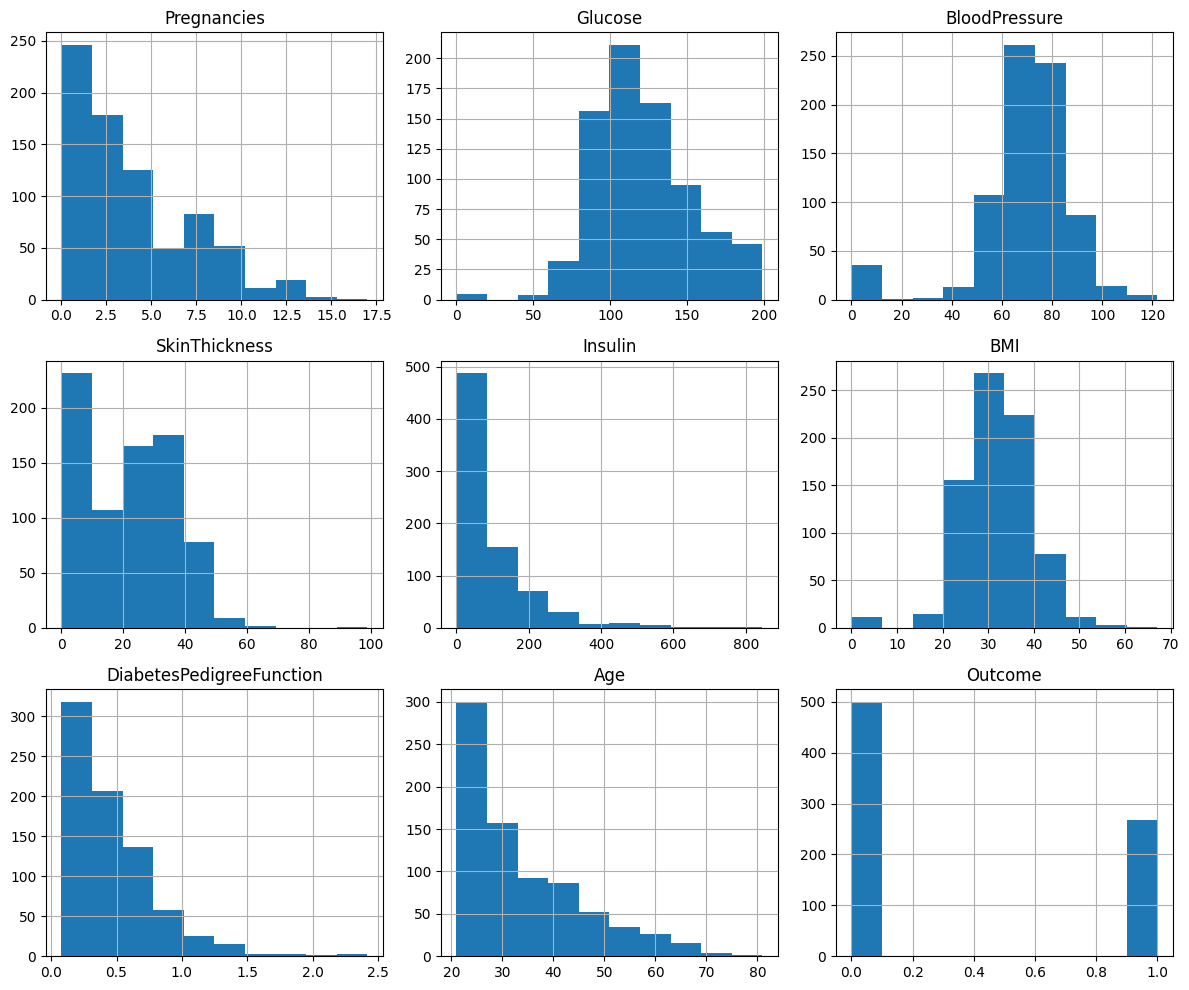

In [6]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

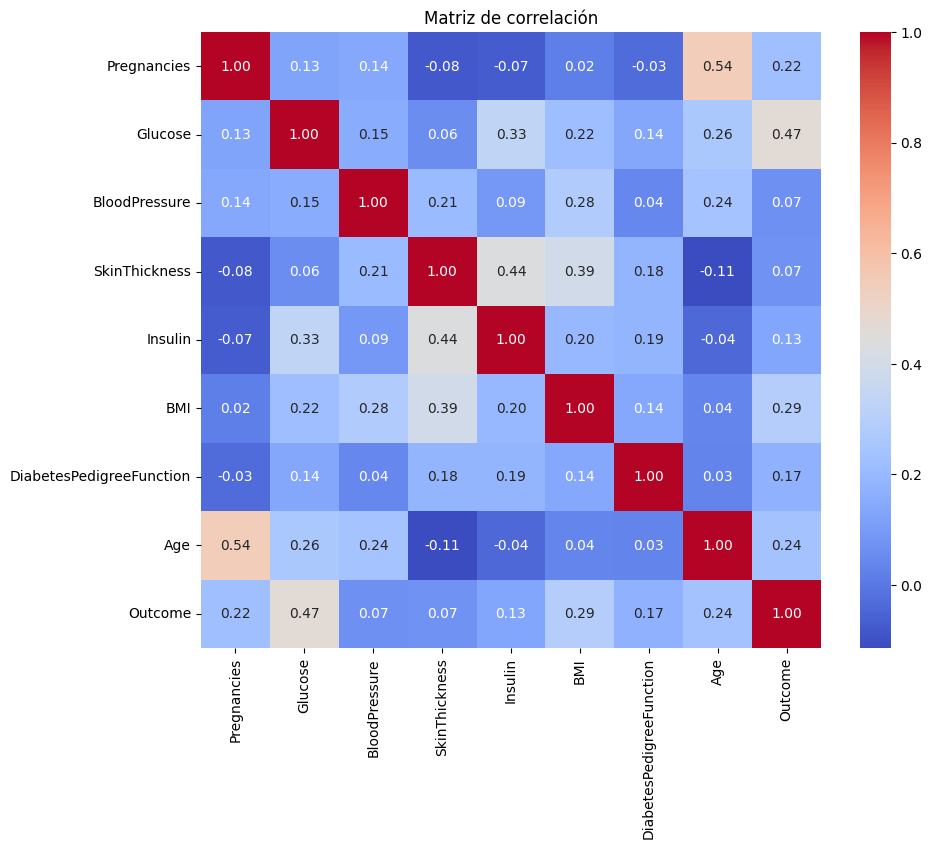

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

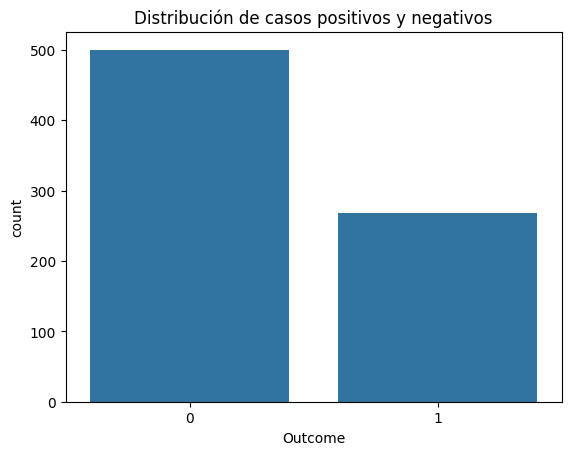

In [8]:
sns.countplot(x="Outcome", data=df)
plt.title("Distribución de casos positivos y negativos")
plt.show()

Esta desbalanceado

## Machine Learning (Gradient Boosting)

In [2]:
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
gb_model = GradientBoostingClassifier(random_state = 2025, n_estimators=100)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=2025)

In [7]:
y_pred = gb_model.predict(X_test)

In [8]:
print("Resultados del Gradient Boosting:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Resultados del Gradient Boosting:
[[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



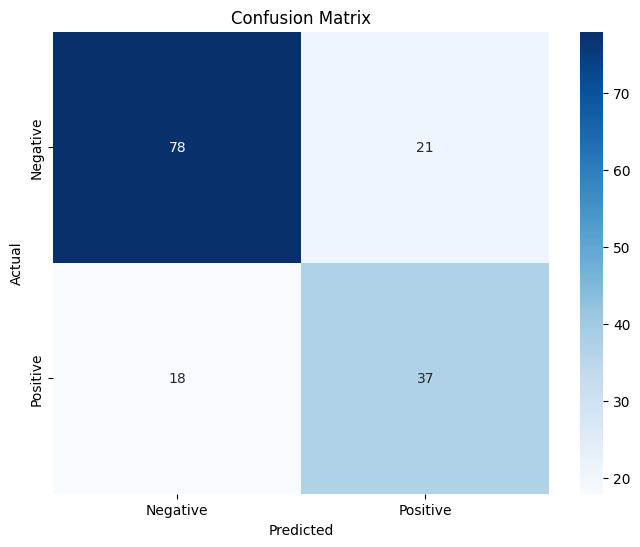

In [9]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=2025),
                           param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor score en validación cruzada:", grid_search.best_score_)

# Evaluación final
best_gb = grid_search.best_estimator_
y_pred_best = best_gb.predict(X_test)
print("Evaluación con mejor modelo:")
print(classification_report(y_test, y_pred_best))

Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mejor score en validación cruzada: 0.7752765560442489
Evaluación con mejor modelo:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



## Guardar el modelo como pkl

In [12]:
joblib.dump(gb_model, "/workspaces/Gradient-Boosting/models/gb_model.pkl")

['/workspaces/Gradient-Boosting/models/gb_model.pkl']